In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("companies.csv")
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [3]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [4]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [5]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [6]:
company.drop(['region','city','state_code'], axis=1, inplace=True)
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [7]:
company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'],axis=1, inplace=True)
company.head(30)

,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,...,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,...,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,NaN,synergie-media.com,http://www.synergie-media.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,NaN
6,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,NaN
7,HostNine,hostnine,/company/hostnine,NaN,operating,NaN,NaN,hostnine.com,http://www.hostnine.com,Hostnine,...,NaN,NaN,NaN,2011-06-20,2011-06-20,1.0,1.0,NaN,NaN,NaN
8,Thomas Publishing,thomas publishing,/company/thomas-publishing,advertising,operating,NaN,NaN,thomaspublishing.com,http://www.thomaspublishing.com,NaN,...,NaN,NaN,NaN,1999-06-01,1999-06-01,1.0,2.0,40.712775,-74.005973,NaN
9,Vetter Idea Management System,vetter idea management system,/company/vetter-idea-management-system,enterprise,operating,2011-08-01,NaN,getvetter.com,http://www.getvetter.com,getvetter,...,NaN,NaN,NaN,2011-08-01,2011-08-01,1.0,2.0,NaN,NaN,NaN


#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [8]:
company.drop(['domain','homepage_url','twitter_username','logo_url','logo_width','logo_height','short_description','description','overview','tag_list','name','normalized_name','permalink','invested_companies'],axis=1, inplace=True)
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
company.shape

(196553, 19)

#### 1.d. Delete duplicate values if found any.

In [10]:
# Delete duplicate values if found any.
company.duplicated().any()

True

In [11]:
# Since, there are duplicate values in the dataset let's see how many duplicate values are present.
company.duplicated().sum()

87089

In [12]:
# Let's delete all the duplicate values
company.drop_duplicates(subset=None, keep='first', inplace=True)
company.shape

(109464, 19)

In [13]:
# check if any left
company.duplicated().sum()

0

#### 1.e. Delete those which has more than 98% of null values.

In [14]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


In [15]:
# # Since we can see only nan values so let's check how much of rows has nan values.
company.isnull().sum()

category_code           12230
status                      0
founded_at              26913
closed_at              106845
country_code            24870
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
funding_total_usd       81602
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
ROI                    108738
dtype: int64

In [16]:
null_value_percent = (company.isnull().sum()/len(company))*100
null_value_percent

category_code          11.172623
status                  0.000000
founded_at             24.586165
closed_at              97.607433
country_code           22.719798
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
funding_total_usd      74.546883
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
ROI                    99.336768
dtype: float64

In [17]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


In [18]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
company = company.drop(['first_investment_at','last_investment_at','investment_rounds','ROI','last_funding_at'],axis=1)
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,2005-10-01,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [19]:
#drop unnecessary columns
company = company.drop(['first_milestone_at','last_milestone_at','first_funding_at'], axis=1)
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [20]:
company.loc[:,['status','country_code','category_code','founded_at']].isnull().any()

status           False
country_code      True
category_code     True
founded_at        True
dtype: bool

In [21]:
company.loc[:,['status','country_code','category_code','founded_at']].isnull().sum()

status               0
country_code     24870
category_code    12230
founded_at       26913
dtype: int64

In [22]:
# Since we can see only nan values so et's check how much of rows has nan values.
company.dropna(subset=['status','country_code','category_code','founded_at'], axis=0, inplace=True)
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [23]:
company.loc[:,['status','country_code','category_code','founded_at']].isnull().sum()

status           0
country_code     0
category_code    0
founded_at       0
dtype: int64

In [24]:
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

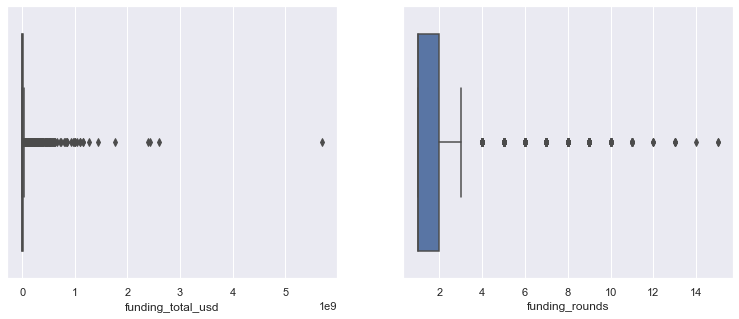

In [25]:
#Detecting Outliers
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(company['funding_total_usd'])

plt.subplot(1,2,2)
sns.boxplot(company['funding_rounds'])
plt.show()

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


#### 2.b.1. Find the IQR

In [26]:
# For funding_total_usd
Q1_usd = company['funding_total_usd'].quantile(0.25)
Q3_usd = company['funding_total_usd'].quantile(0.75)


# For funding_rounds
Q1_rounds = company['funding_rounds'].quantile(0.25)
Q3_rounds = company['funding_rounds'].quantile(0.75)

Q1_usd, Q3_usd, Q1_rounds, Q3_rounds


(511038.0, 12000000.0, 1.0, 2.0)

In [27]:
#IQR for funding_total_usd
iqr_usd = Q3_usd - Q1_usd

#IQR for funding_rounds
iqr_rounds = Q3_rounds - Q1_rounds

iqr_usd, iqr_rounds

(11488962.0, 1.0)

#### 2.b.1. Find the Upper and Lower limit

In [28]:
# For funding_total_usd
upper_limit_usd = Q3_usd + 1.5 * iqr_usd
lower_limit_usd = Q1_usd - 1.5 * iqr_usd

# For funding_rounds
upper_limit_rounds = Q3_rounds + 1.5 * iqr_rounds
lower_limit_rounds = Q1_rounds - 1.5 * iqr_rounds

upper_limit_usd, lower_limit_usd, upper_limit_rounds, lower_limit_rounds

(29233443.0, -16722405.0, 3.5, -0.5)

#### 2.b.1.  Find outliers

In [29]:
# For funding_total_usd
company[company['funding_total_usd'] > upper_limit_usd]
company[company['funding_total_usd'] < lower_limit_usd]

# For funding_rounds
company[company['funding_rounds'] < lower_limit_rounds]
company[company['funding_rounds'] > upper_limit_rounds]

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
19,health,operating,2007-10-01,NaN,USA,5.0,68069200.0,NaN,14.0,37.774929,-122.419415
66,mobile,acquired,2005-01-01,NaN,USA,7.0,121500000.0,3.0,45.0,42.360082,-71.058880
134,ecommerce,operating,2006-01-01,NaN,USA,5.0,46400000.0,2.0,20.0,42.360082,-71.058880
224,advertising,operating,2005-01-01,NaN,USA,5.0,37570663.0,2.0,4.0,38.040584,-84.503716
243,enterprise,acquired,2008-09-10,NaN,USA,5.0,142000000.0,3.0,38.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...
196293,security,acquired,1999-01-01,NaN,USA,4.0,24500000.0,2.0,2.0,43.071755,-70.762553
196356,travel,operating,2010-01-01,NaN,USA,4.0,3265000.0,4.0,9.0,39.739236,-104.990251
196360,security,operating,2003-03-01,NaN,USA,7.0,28200000.0,3.0,20.0,38.984652,-77.094709
196496,games_video,acquired,2004-01-01,NaN,CHN,4.0,286500000.0,2.0,3.0,31.230390,121.473702


#### 2.b.1. Drop the outliers

In [30]:
# For funding_total_usd
d1 = company['funding_total_usd'] < upper_limit_usd
d2 = company['funding_total_usd']  > lower_limit_usd
company.drop(company[d1 & d2].index, inplace = True)

# For funding_rounds
d3 = company['funding_rounds'] < upper_limit_rounds
d4 = company['funding_rounds'] > lower_limit_rounds
company.drop(company[d3 & d4].index, inplace = True)

#.index is used for removing outliers from rows


In [31]:
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
15,games_video,operating,2008-01-01,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964
19,health,operating,2007-10-01,NaN,USA,5.0,68069200.0,NaN,14.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...
196543,security,operating,2008-04-30,NaN,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373
196545,software,operating,2004-01-01,NaN,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091


#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [32]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [33]:
# For founded_at
company['founded_at'] = pd.to_datetime(company['founded_at'],format="%Y-%m-%d")
company["founded_at"] = pd.to_datetime(company["founded_at"],format ="%Y-%m-%d").dt.year

# closed_at
company['closed_at'] = pd.to_datetime(company['closed_at'],format="%Y-%m-%d")
company["closed_at"] = pd.to_datetime(company["closed_at"],format ="%Y-%m-%d").dt.year

company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
15,games_video,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964
19,health,operating,2007,NaN,USA,5.0,68069200.0,NaN,14.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...
196543,security,operating,2008,NaN,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373
196545,software,operating,2004,NaN,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196550,consulting,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091


 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [34]:
# 1. category_code
unique = pd.unique(company['category_code'])
unique, len(unique)
# 42 unique values

(array(['advertising', 'cleantech', 'games_video', 'health', 'software',
        'consulting', 'finance', 'web', 'mobile', 'network_hosting',
        'other', 'ecommerce', 'public_relations', 'hardware', 'enterprise',
        'search', 'semiconductor', 'legal', 'transportation', 'analytics',
        'education', 'security', 'biotech', 'news', 'messaging', 'sports',
        'automotive', 'social', 'local', 'travel', 'nanotech',
        'photo_video', 'music', 'design', 'medical', 'fashion',
        'real_estate', 'nonprofit', 'hospitality', 'manufacturing', 'pets',
        'government'], dtype=object),
 42)

In [35]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.

company['category_code'].value_counts().head(15)

software            7741
web                 5746
other               4315
ecommerce           3721
advertising         2789
consulting          2566
mobile              2252
games_video         1913
enterprise          1484
public_relations    1307
network_hosting      994
hardware             832
education            815
search               760
biotech              712
Name: category_code, dtype: int64

In [36]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.

def get_category(actual_category):
    
    category_list = ['software','web','ecommerce','advertising','consulting','mobile','games_video','enterprise',
                 'public_relations','network_hosting','hardware','education','search','biotech']
    
    if actual_category in category_list:
        return actual_category
    else:
        return 'other'

In [37]:
company['category_code'] = company.apply(lambda x: get_category(x['category_code']),axis =1)
company['category_code']

5         advertising
6               other
12        advertising
15        games_video
19              other
             ...     
196543          other
196545       software
196548      ecommerce
196550     consulting
196551         search
Name: category_code, Length: 41852, dtype: object

In [38]:
# Let's check if we've more than 15 columns
company.category_code.value_counts()

other               8220
software            7741
web                 5746
ecommerce           3721
advertising         2789
consulting          2566
mobile              2252
games_video         1913
enterprise          1484
public_relations    1307
network_hosting      994
hardware             832
education            815
search               760
biotech              712
Name: category_code, dtype: int64

In [39]:
# One-hot encoding to category_code
category = company[["category_code"]]
category = pd.get_dummies(category, drop_first= True)
category.head()

,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [40]:
# Concatenate category with company dataset
company = pd.concat([company, category], axis = 1)
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,...,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,...,0,0,0,0,0,0,0,0,0,0
6,other,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,...,0,0,0,0,0,1,0,0,0,0
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,...,0,0,0,0,0,0,0,0,0,0
15,games_video,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,...,0,1,0,0,0,0,0,0,0,0
19,other,operating,2007,NaN,USA,5.0,68069200.0,NaN,14.0,37.774929,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,other,operating,2008,NaN,USA,NaN,NaN,1.0,5.0,38.846224,...,0,0,0,0,0,1,0,0,0,0
196545,software,operating,2004,NaN,USA,NaN,NaN,NaN,NaN,40.748350,...,0,0,0,0,0,0,0,0,1,0
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,...,0,0,0,0,0,0,0,0,0,0
196550,consulting,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Since, We've added the encoded category_columns, let's delete original category_code
company = company.drop(['category_code'], axis=1)
company.head()

,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
5,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,0,0,0,0,0
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,0,0,0,1,0,0,0,0
12,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,0,0,0,0
15,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,...,0,1,0,0,0,0,0,0,0,0
19,operating,2007,NaN,USA,5.0,68069200.0,NaN,14.0,37.774929,-122.419415,...,0,0,0,0,0,1,0,0,0,0


### Let's encode 'country' column now.

In [42]:
# 1. country_code
unique_country = pd.unique(company['country_code'])
unique_country, len(unique_country)

(array(['MAR', 'IND', 'USA', 'AUS', 'JPN', 'NLD', 'EGY', 'ISR', 'GBR',
        'THA', 'AUT', 'IRL', 'BRA', 'SGP', 'CHN', 'ESP', 'KOR', 'TUR',
        'DNK', 'PAK', 'HUN', 'CAN', 'POL', 'FRA', 'GRC', 'PRT', 'BLR',
        'DEU', 'CSS', 'MKD', 'ARG', 'RUS', 'UKR', 'ITA', 'NZL', 'CZE',
        'VNM', 'CHE', 'HRV', 'BEN', 'CHL', 'GHA', 'ZAF', 'EST', 'NOR',
        'SWE', 'BEL', 'FIN', 'TWN', 'CRI', 'HKG', 'MEX', 'ISL', 'MYS',
        'BGD', 'BOL', 'LUX', 'COL', 'ARE', 'IDN', 'ROM', 'ANT', 'NGA',
        'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN', 'BGR', 'PER', 'LVA',
        'CYP', 'PHL', 'LAO', 'NPL', 'MDA', 'CMR', 'UGA', 'TUN', 'URY',
        'MUS', 'VEN', 'OMN', 'ECU', 'KWT', 'JOR', 'LTU', 'ALB', 'SVK',
        'SVN', 'QAT', 'GTM', 'PCN', 'BWA', 'DZA', 'GRD', 'LBN', 'GIB',
        'PAN', 'MTQ', 'PRI', 'BIH', 'DMA', 'BHR', 'SLE', 'TTO', 'VCT',
        'ARA', 'BRB', 'NAM', 'SLV', 'AFG', 'BLZ', 'UZB', 'LIE', 'IRN',
        'ARM', 'ATG', 'UMI', 'DOM', 'MDV', 'MMR', 'KAZ', 'PST', 'JAM',
      

In [43]:

# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.

unique_country= company['country_code'].value_counts()
unique_country


USA    22240
GBR     3770
IND     2619
CAN     1963
DEU      895
       ...  
NCL        1
SUR        1
BMU        1
IOT        1
MDG        1
Name: country_code, Length: 161, dtype: int64

In [44]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.

def get_country(actual_country):
    
    country_list = ['USA','GBR','IND','CAN','DEU','AUS','FRA','ESP','NLD','ISR','IRL','BRA']

    if actual_country in country_list:
        return actual_country
    else:
        return 'other'

In [45]:
company['country_code'] = company.apply(lambda x: get_country(x['country_code']),axis =1)
company['country_code']

5         other
6           IND
12          USA
15          USA
19          USA
          ...  
196543      USA
196545      USA
196548      USA
196550      USA
196551      USA
Name: country_code, Length: 41852, dtype: object

In [46]:
company.head(10)

,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
5,operating,2007,NaN,other,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,0,0,0,0,0
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,0,0,0,1,0,0,0,0
12,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,0,0,0,0
15,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,...,0,1,0,0,0,0,0,0,0,0
19,operating,2007,NaN,USA,5.0,68069200.0,NaN,14.0,37.774929,-122.419415,...,0,0,0,0,0,1,0,0,0,0
22,operating,2011,NaN,AUS,NaN,NaN,1.0,2.0,49.050438,-122.304470,...,0,0,0,0,0,0,0,0,1,0
25,operating,2011,NaN,USA,NaN,NaN,NaN,NaN,37.774929,-122.419415,...,0,0,0,0,0,0,0,0,1,0
30,operating,2009,NaN,USA,NaN,NaN,1.0,2.0,37.774929,-122.419415,...,0,0,0,0,0,0,0,0,0,0
31,operating,2012,NaN,USA,NaN,NaN,4.0,3.0,36.031858,-84.027655,...,0,0,0,0,0,1,0,0,0,0
33,operating,2005,NaN,USA,NaN,NaN,NaN,NaN,41.878114,-87.629798,...,0,0,0,0,0,0,0,0,0,0


In [47]:
company.country_code.value_counts().head()

USA      22240
other     6543
GBR       3770
IND       2619
CAN       1963
Name: country_code, dtype: int64

In [48]:
# One-hot encoding to category_code
country = company[["country_code"]]
country = pd.get_dummies(country, drop_first= True)
country.head()

,country_code_BRA,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
5,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,1,0
15,0,0,0,0,0,0,0,0,0,0,1,0
19,0,0,0,0,0,0,0,0,0,0,1,0


In [49]:
# Concatenate category with company dataset
company = pd.concat([company, country], axis = 1)
company

,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
5,operating,2007,NaN,other,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,0,0,0,0,1
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,0,0,1,0,0,0,0,0
12,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,0,0,1,0
15,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,...,0,0,0,0,0,0,0,0,1,0
19,operating,2007,NaN,USA,5.0,68069200.0,NaN,14.0,37.774929,-122.419415,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,operating,2008,NaN,USA,NaN,NaN,1.0,5.0,38.846224,-77.306373,...,0,0,0,0,0,0,0,0,1,0
196545,operating,2004,NaN,USA,NaN,NaN,NaN,NaN,40.748350,-74.323219,...,0,0,0,0,0,0,0,0,1,0
196548,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,...,0,0,0,0,0,0,0,0,1,0
196550,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091,...,0,0,0,0,0,0,0,0,1,0


In [50]:
# Since, We've added the encoded country_code , let's delete original category_code
company = company.drop(['country_code'], axis=1)
company.head()

,status,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
5,operating,2007,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,0,...,0,0,0,0,0,0,0,0,0,1
6,operating,2008,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,0,...,0,0,0,0,1,0,0,0,0,0
12,operating,2008,NaN,NaN,NaN,1.0,2.0,35.686975,-105.937799,0,...,0,0,0,0,0,0,0,0,1,0
15,operating,2008,NaN,NaN,NaN,1.0,3.0,33.078655,-116.601964,0,...,0,0,0,0,0,0,0,0,1,0
19,operating,2007,NaN,5.0,68069200.0,NaN,14.0,37.774929,-122.419415,0,...,0,0,0,0,0,0,0,0,1,0


### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [51]:
def isClosed(company):
    if company['status'] == 'operating' and 'ipo':
        return 1
    else:
        return 0


In [52]:
company['isClosed'] = company.apply(lambda company:isClosed(company), axis=1)
company['isClosed']

5         1
6         1
12        1
15        1
19        1
         ..
196543    1
196545    1
196548    1
196550    1
196551    1
Name: isClosed, Length: 41852, dtype: int64

In [53]:
pd.unique(company['isClosed'])

array([1, 0], dtype=int64)

#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days, 
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

In [54]:
unique_closed_at = pd.unique(company['closed_at'])
unique_closed_at

array([  nan, 2010., 2009., 2013., 2012., 2011., 2008., 2001., 1963.,
       1991., 2007., 2006., 2004.])

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [55]:
close_detail = company['closed_at']
status = company['status']

closedAt = []
zip_object = zip(status,close_detail)

for status,close_detail in zip_object:
    if (status == 'acquired'):
        close = close_detail
        closedAt.append(close)
    elif (status == 'closed'):
        close = close_detail
        closedAt.append(close)
    else:
        close = '2021'
        closedAt.append(close)
    
company['closed_at'] = pd.DataFrame(closedAt)
company['closed_at']


5         2021
6         2021
12        2021
15        2021
19        2021
          ... 
196543     NaN
196545     NaN
196548     NaN
196550     NaN
196551     NaN
Name: closed_at, Length: 41852, dtype: object

In [56]:
company.dropna(axis=0, subset=['closed_at'],inplace=True)
company

,status,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed
5,operating,2007,2021,NaN,NaN,NaN,2.0,30.427755,-9.598107,0,...,0,0,0,0,0,0,0,0,1,1
6,operating,2008,2021,NaN,NaN,NaN,NaN,22.307159,73.181219,0,...,0,0,0,1,0,0,0,0,0,1
12,operating,2008,2021,NaN,NaN,1.0,2.0,35.686975,-105.937799,0,...,0,0,0,0,0,0,0,1,0,1
15,operating,2008,2021,NaN,NaN,1.0,3.0,33.078655,-116.601964,0,...,0,0,0,0,0,0,0,1,0,1
19,operating,2007,2021,5.0,68069200.0,NaN,14.0,37.774929,-122.419415,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41829,operating,1922,2021,NaN,NaN,1.0,5.0,29.424122,-98.493628,0,...,0,0,0,0,0,0,0,1,0,1
41835,operating,2001,2021,NaN,NaN,NaN,NaN,36.169941,-115.139830,0,...,0,0,0,0,0,0,0,1,0,1
41841,operating,2012,2021,NaN,NaN,NaN,NaN,33.748995,-84.387982,0,...,0,0,0,0,0,0,0,1,0,1
41846,operating,2006,2021,NaN,NaN,1.0,2.0,31.418714,73.079107,0,...,0,0,0,0,0,0,0,0,1,1


##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [57]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11516 entries, 5 to 41850
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   status                          11516 non-null  object 
 1   founded_at                      11516 non-null  int64  
 2   closed_at                       11516 non-null  object 
 3   funding_rounds                  280 non-null    float64
 4   funding_total_usd               278 non-null    float64
 5   milestones                      6113 non-null   float64
 6   relationships                   8124 non-null   float64
 7   lat                             11061 non-null  float64
 8   lng                             11061 non-null  float64
 9   category_code_biotech           11516 non-null  uint8  
 10  category_code_consulting        11516 non-null  uint8  
 11  category_code_ecommerce         11516 non-null  uint8  
 12  category_code_education         

In [58]:
#creating empty list for active_days
active_days = []

print("Values of active_days: ", active_days)
print("Type of active_days: ", type(active_days))

Values of active_days:  []
Type of active_days:  <class 'list'>


In [59]:
closed_at = company['closed_at']
founded_at = company['founded_at']

In [60]:
active_days = []
zip_object = zip(closed_at, founded_at)

for closed_at, founded_at in zip_object:
    if float(closed_at) > float(founded_at):       
        days = float(closed_at) - float(founded_at)
        days = 365 * days
        active_days.append(days)
    else:
        index_name = company[(company['founded_at'] == founded_at) & (company['closed_at'] == closed_at)].index
        company.drop(index_name, inplace = True)
    


In [61]:
company['active_days'] = pd.DataFrame(active_days)
company['active_days']

5         3650.0
6         3650.0
12        4745.0
15        3650.0
19       13870.0
          ...   
41829        NaN
41835        NaN
41841        NaN
41846        NaN
41850        NaN
Name: active_days, Length: 11493, dtype: float64

#### 2.b.iii. Then, delete the closed_at column.

In [62]:
company = company.drop(['closed_at'], axis=1)
company.head()

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
5,operating,2007,NaN,NaN,NaN,2.0,30.427755,-9.598107,0,0,...,0,0,0,0,0,0,0,1,1,3650.0
6,operating,2008,NaN,NaN,NaN,NaN,22.307159,73.181219,0,0,...,0,0,1,0,0,0,0,0,1,3650.0
12,operating,2008,NaN,NaN,1.0,2.0,35.686975,-105.937799,0,0,...,0,0,0,0,0,0,1,0,1,4745.0
15,operating,2008,NaN,NaN,1.0,3.0,33.078655,-116.601964,0,0,...,0,0,0,0,0,0,1,0,1,3650.0
19,operating,2007,5.0,68069200.0,NaN,14.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,1,13870.0


### Let's work on target variabe now.

In [63]:
unique_status = pd.unique(company['status'])
unique_status

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [64]:
def get_status(status):
    if status == 'operating':
        return 1
    elif status == 'acquired':
        return 2
    elif status == 'closed':
        return 3
    else:
        return 4

In [65]:
company['status'] = company.apply(lambda x: get_status(x['status']),axis =1)
company['status']

5        1
6        1
12       1
15       1
19       1
        ..
41829    1
41835    1
41841    1
41846    1
41850    1
Name: status, Length: 11493, dtype: int64

In [66]:
company.status.value_counts().head()

1    10987
2      383
3       70
4       53
Name: status, dtype: int64

### Remove the null vaues with the mean value in 'Numerical Data'

In [67]:
company

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
5,1,2007,NaN,NaN,NaN,2.0,30.427755,-9.598107,0,0,...,0,0,0,0,0,0,0,1,1,3650.0
6,1,2008,NaN,NaN,NaN,NaN,22.307159,73.181219,0,0,...,0,0,1,0,0,0,0,0,1,3650.0
12,1,2008,NaN,NaN,1.0,2.0,35.686975,-105.937799,0,0,...,0,0,0,0,0,0,1,0,1,4745.0
15,1,2008,NaN,NaN,1.0,3.0,33.078655,-116.601964,0,0,...,0,0,0,0,0,0,1,0,1,3650.0
19,1,2007,5.0,68069200.0,NaN,14.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,1,13870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41829,1,1922,NaN,NaN,1.0,5.0,29.424122,-98.493628,0,0,...,0,0,0,0,0,0,1,0,1,NaN
41835,1,2001,NaN,NaN,NaN,NaN,36.169941,-115.139830,0,0,...,0,0,0,0,0,0,1,0,1,NaN
41841,1,2012,NaN,NaN,NaN,NaN,33.748995,-84.387982,0,0,...,0,0,0,0,0,0,1,0,1,NaN
41846,1,2006,NaN,NaN,1.0,2.0,31.418714,73.079107,0,0,...,0,0,0,0,0,0,0,1,1,NaN


In [68]:
company.dropna(inplace = True)

In [69]:
company.reset_index()

,index,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,66,2,2005,7.0,121500000.0,3.0,45.0,42.360082,-71.058880,0,...,0,0,0,0,0,0,1,0,0,3650.0
1,134,1,2006,5.0,46400000.0,2.0,20.0,42.360082,-71.058880,0,...,0,0,0,0,0,0,1,0,1,2920.0
2,224,1,2005,5.0,37570663.0,2.0,4.0,38.040584,-84.503716,0,...,0,0,0,0,0,0,1,0,1,3650.0
3,243,2,2008,5.0,142000000.0,3.0,38.0,37.774929,-122.419415,0,...,0,0,0,0,0,0,1,0,0,3650.0
4,272,1,2006,4.0,57735800.0,4.0,50.0,40.416775,-3.703790,0,...,0,0,0,0,0,0,0,0,1,5840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,10380,1,2004,5.0,30200000.0,3.0,24.0,37.774929,-122.419415,0,...,0,0,0,0,0,0,1,0,1,3650.0
97,10383,1,2011,4.0,29700000.0,2.0,12.0,40.712775,-74.005973,0,...,0,0,0,0,0,0,1,0,1,5840.0
98,10385,1,2007,5.0,50500000.0,3.0,13.0,36.162664,-86.781602,0,...,0,0,0,0,0,0,1,0,1,5110.0
99,10540,1,2011,5.0,84587904.0,1.0,3.0,41.948708,-71.073116,1,...,0,0,0,0,0,0,1,0,1,10220.0


In [70]:
# Final null check on data
company.isnull().sum()

status                            0
founded_at                        0
funding_rounds                    0
funding_total_usd                 0
milestones                        0
relationships                     0
lat                               0
lng                               0
category_code_biotech             0
category_code_consulting          0
category_code_ecommerce           0
category_code_education           0
category_code_enterprise          0
category_code_games_video         0
category_code_hardware            0
category_code_mobile              0
category_code_network_hosting     0
category_code_other               0
category_code_public_relations    0
category_code_search              0
category_code_software            0
category_code_web                 0
country_code_BRA                  0
country_code_CAN                  0
country_code_DEU                  0
country_code_ESP                  0
country_code_FRA                  0
country_code_GBR            

In [71]:
#Finally Save cleaned Data.
company.to_csv('Cleaned_D.csv')

# Exploratory Data Analysis

In [72]:
company

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
66,2,2005,7.0,121500000.0,3.0,45.0,42.360082,-71.058880,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
134,1,2006,5.0,46400000.0,2.0,20.0,42.360082,-71.058880,0,0,...,0,0,0,0,0,0,1,0,1,2920.0
224,1,2005,5.0,37570663.0,2.0,4.0,38.040584,-84.503716,0,0,...,0,0,0,0,0,0,1,0,1,3650.0
243,2,2008,5.0,142000000.0,3.0,38.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
272,1,2006,4.0,57735800.0,4.0,50.0,40.416775,-3.703790,0,0,...,0,0,0,0,0,0,0,0,1,5840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10380,1,2004,5.0,30200000.0,3.0,24.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,1,3650.0
10383,1,2011,4.0,29700000.0,2.0,12.0,40.712775,-74.005973,0,0,...,0,0,0,0,0,0,1,0,1,5840.0
10385,1,2007,5.0,50500000.0,3.0,13.0,36.162664,-86.781602,0,0,...,0,0,0,0,0,0,1,0,1,5110.0
10540,1,2011,5.0,84587904.0,1.0,3.0,41.948708,-71.073116,1,0,...,0,0,0,0,0,0,1,0,1,10220.0


In [73]:
company.reset_index()

,index,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,66,2,2005,7.0,121500000.0,3.0,45.0,42.360082,-71.058880,0,...,0,0,0,0,0,0,1,0,0,3650.0
1,134,1,2006,5.0,46400000.0,2.0,20.0,42.360082,-71.058880,0,...,0,0,0,0,0,0,1,0,1,2920.0
2,224,1,2005,5.0,37570663.0,2.0,4.0,38.040584,-84.503716,0,...,0,0,0,0,0,0,1,0,1,3650.0
3,243,2,2008,5.0,142000000.0,3.0,38.0,37.774929,-122.419415,0,...,0,0,0,0,0,0,1,0,0,3650.0
4,272,1,2006,4.0,57735800.0,4.0,50.0,40.416775,-3.703790,0,...,0,0,0,0,0,0,0,0,1,5840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,10380,1,2004,5.0,30200000.0,3.0,24.0,37.774929,-122.419415,0,...,0,0,0,0,0,0,1,0,1,3650.0
97,10383,1,2011,4.0,29700000.0,2.0,12.0,40.712775,-74.005973,0,...,0,0,0,0,0,0,1,0,1,5840.0
98,10385,1,2007,5.0,50500000.0,3.0,13.0,36.162664,-86.781602,0,...,0,0,0,0,0,0,1,0,1,5110.0
99,10540,1,2011,5.0,84587904.0,1.0,3.0,41.948708,-71.073116,1,...,0,0,0,0,0,0,1,0,1,10220.0


In [74]:
company = company.reset_index(drop=True)
company

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,2,2005,7.0,121500000.0,3.0,45.0,42.360082,-71.058880,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
1,1,2006,5.0,46400000.0,2.0,20.0,42.360082,-71.058880,0,0,...,0,0,0,0,0,0,1,0,1,2920.0
2,1,2005,5.0,37570663.0,2.0,4.0,38.040584,-84.503716,0,0,...,0,0,0,0,0,0,1,0,1,3650.0
3,2,2008,5.0,142000000.0,3.0,38.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
4,1,2006,4.0,57735800.0,4.0,50.0,40.416775,-3.703790,0,0,...,0,0,0,0,0,0,0,0,1,5840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,2004,5.0,30200000.0,3.0,24.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,1,3650.0
97,1,2011,4.0,29700000.0,2.0,12.0,40.712775,-74.005973,0,0,...,0,0,0,0,0,0,1,0,1,5840.0
98,1,2007,5.0,50500000.0,3.0,13.0,36.162664,-86.781602,0,0,...,0,0,0,0,0,0,1,0,1,5110.0
99,1,2011,5.0,84587904.0,1.0,3.0,41.948708,-71.073116,1,0,...,0,0,0,0,0,0,1,0,1,10220.0


In [75]:
company.head()

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,2,2005,7.0,121500000.0,3.0,45.0,42.360082,-71.058880,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
1,1,2006,5.0,46400000.0,2.0,20.0,42.360082,-71.058880,0,0,...,0,0,0,0,0,0,1,0,1,2920.0
2,1,2005,5.0,37570663.0,2.0,4.0,38.040584,-84.503716,0,0,...,0,0,0,0,0,0,1,0,1,3650.0
3,2,2008,5.0,142000000.0,3.0,38.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
4,1,2006,4.0,57735800.0,4.0,50.0,40.416775,-3.703790,0,0,...,0,0,0,0,0,0,0,0,1,5840.0


In [76]:
company.columns

Index(['status', 'founded_at', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_games_video', 'category_code_hardware',
       'category_code_mobile', 'category_code_network_hosting',
       'category_code_other', 'category_code_public_relations',
       'category_code_search', 'category_code_software', 'category_code_web',
       'country_code_BRA', 'country_code_CAN', 'country_code_DEU',
       'country_code_ESP', 'country_code_FRA', 'country_code_GBR',
       'country_code_IND', 'country_code_IRL', 'country_code_ISR',
       'country_code_NLD', 'country_code_USA', 'country_code_other',
       'isClosed', 'active_days'],
      dtype='object')

In [77]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   status                          101 non-null    int64  
 1   founded_at                      101 non-null    int64  
 2   funding_rounds                  101 non-null    float64
 3   funding_total_usd               101 non-null    float64
 4   milestones                      101 non-null    float64
 5   relationships                   101 non-null    float64
 6   lat                             101 non-null    float64
 7   lng                             101 non-null    float64
 8   category_code_biotech           101 non-null    uint8  
 9   category_code_consulting        101 non-null    uint8  
 10  category_code_ecommerce         101 non-null    uint8  
 11  category_code_education         101 non-null    uint8  
 12  category_code_enterprise        101 

In [78]:
!pip install pandas-profiling

In [79]:
# To create the simple report quickly
from pandas_profiling import ProfileReport
prof= ProfileReport(company)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Variable Identification

In [80]:
# We have to predict whether the status(target variable) is acquired,operating,closed or ipo - outputvariable
# remaining columns will be predictors(input variable)
y = targets = labels = output_var = company["status"]
x = predictors = input_var = company.loc[:, company.columns != "status"]

In [81]:
y.head()

0    2
1    1
2    1
3    2
4    1
Name: status, dtype: int64

In [82]:
x.head()

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,category_code_ecommerce,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,2005,7.0,121500000.0,3.0,45.0,42.360082,-71.058880,0,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
1,2006,5.0,46400000.0,2.0,20.0,42.360082,-71.058880,0,0,1,...,0,0,0,0,0,0,1,0,1,2920.0
2,2005,5.0,37570663.0,2.0,4.0,38.040584,-84.503716,0,0,0,...,0,0,0,0,0,0,1,0,1,3650.0
3,2008,5.0,142000000.0,3.0,38.0,37.774929,-122.419415,0,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
4,2006,4.0,57735800.0,4.0,50.0,40.416775,-3.703790,0,0,0,...,0,0,0,0,0,0,0,0,1,5840.0


In [83]:
# Print the Target variable and Input Variables
print("Input Variable", list(x.columns))
print("Output Variables", "['status']")

Input Variable ['founded_at', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng', 'category_code_biotech', 'category_code_consulting', 'category_code_ecommerce', 'category_code_education', 'category_code_enterprise', 'category_code_games_video', 'category_code_hardware', 'category_code_mobile', 'category_code_network_hosting', 'category_code_other', 'category_code_public_relations', 'category_code_search', 'category_code_software', 'category_code_web', 'country_code_BRA', 'country_code_CAN', 'country_code_DEU', 'country_code_ESP', 'country_code_FRA', 'country_code_GBR', 'country_code_IND', 'country_code_IRL', 'country_code_ISR', 'country_code_NLD', 'country_code_USA', 'country_code_other', 'isClosed', 'active_days']
Output Variables ['status']


# Univariate Analysis

In [84]:
# Setting a Style
sns.set(style='whitegrid', palette='muted', color_codes=True)

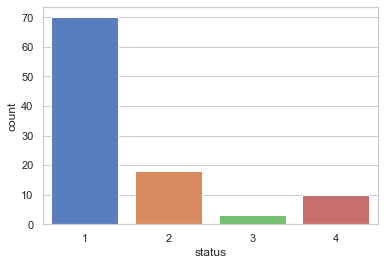

In [85]:
# Let's visualize the status count
sns.countplot(company.status)
plt.show()

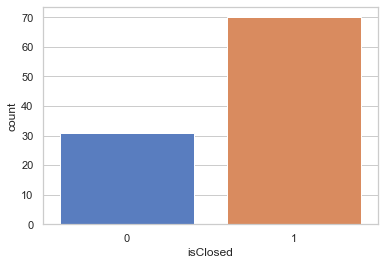

In [86]:
# Let's visualize the isClosed count
sns.countplot(company.isClosed)
plt.show()

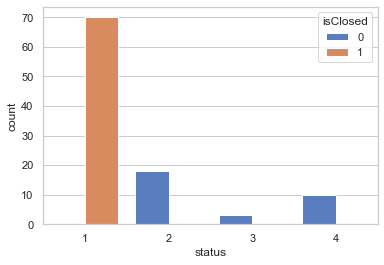

In [87]:
#Let's visualize the data by isClosed
sns.countplot(company.status,hue=company.isClosed)
plt.show()

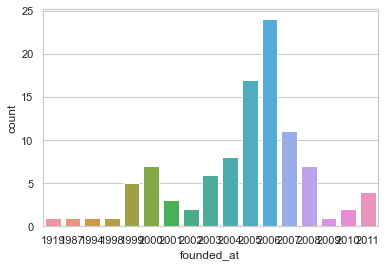

In [88]:
# Let's visualize the founded_at count
sns.countplot(company.founded_at)
plt.show()

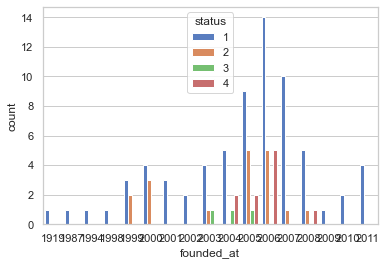

In [89]:
#Let's visualize the data by status
sns.countplot(company.founded_at, hue=company.status)
plt.show()

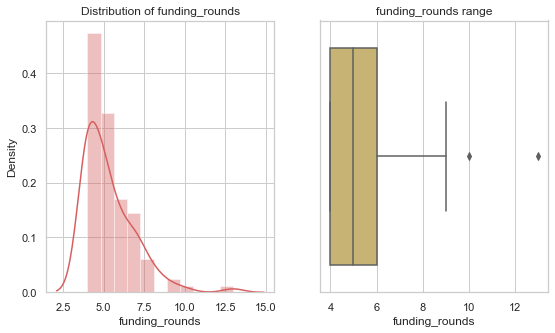

In [90]:
# Numerical Data
#Distribution of funding_rounds
fig, axes=plt.subplots(1,2,figsize=(9,5))
sns.distplot(company.funding_rounds, kde=True, hist=True, color='r', ax=axes[0])


# To find out the range of funding_rounds
sns.boxplot(company.funding_rounds, color='y', ax=axes[1])

axes[0].set_title('Distribution of funding_rounds')
axes[1].set_title('funding_rounds range')

plt.show()


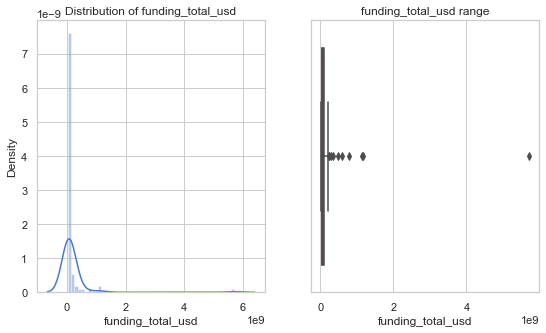

In [91]:
#Distribution of funding_total_usd
fig, axes=plt.subplots(1,2,figsize=(9,5))

sns.distplot(company.funding_total_usd, kde=True, hist=True, color='b', ax=axes[0])

# To find out the range of funding_total_usd
sns.boxplot(company.funding_total_usd, color='red', ax=axes[1])

axes[0].set_title('Distribution of funding_total_usd')
axes[1].set_title('funding_total_usd range')


plt.show()

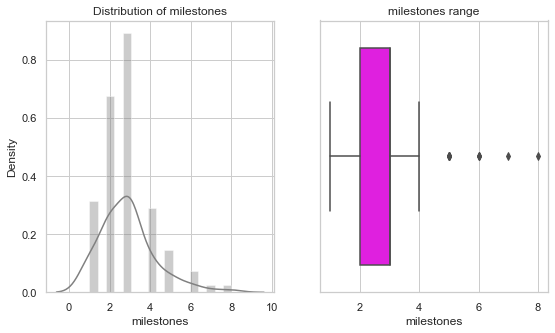

In [92]:
#Distribution of milestones
fig, axes=plt.subplots(1,2,figsize=(9,5))
sns.distplot(company.milestones, kde=True, hist=True, color='grey', ax=axes[0])

# To find out the range of milestones

sns.boxplot(company.milestones, color='magenta', ax=axes[1])

axes[0].set_title('Distribution of milestones')
axes[1].set_title('milestones range')


plt.show()


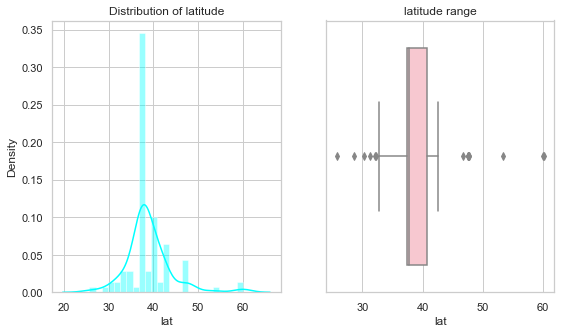

In [93]:
#Distribution of latitude
fig, axes=plt.subplots(1,2,figsize=(9,5))

sns.distplot(company.lat, kde=True, hist=True, color='cyan', ax=axes[0])

# To find out the range of latitude
sns.boxplot(company.lat, color='pink', ax=axes[1])

axes[0].set_title('Distribution of latitude')
axes[1].set_title('latitude range')


plt.show()

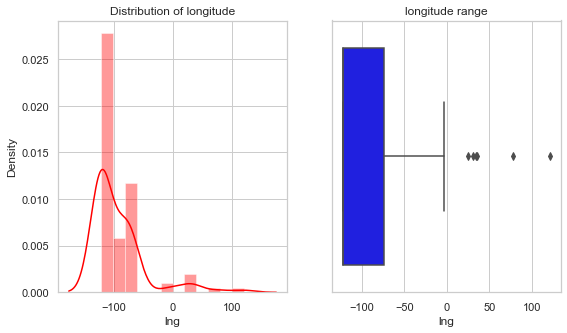

In [94]:
#Distribution of longitude
fig, axes=plt.subplots(1,2,figsize=(9,5))
sns.distplot(company.lng, kde=True, hist=True, color='red', ax=axes[0])

# To find out the range of longitude
sns.boxplot(company.lng, color='blue', ax=axes[1])

axes[0].set_title('Distribution of longitude')
axes[1].set_title('longitude range')

plt.show()

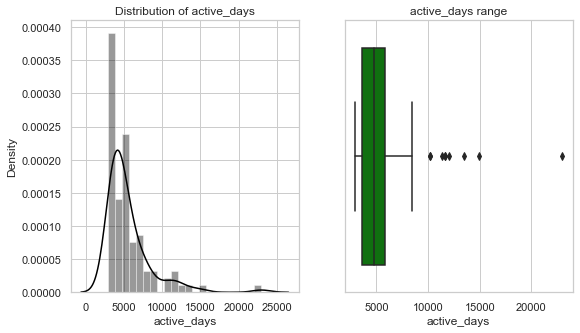

In [95]:
#Distribution of active_days
fig, axes=plt.subplots(1,2,figsize=(9,5))

sns.distplot(company.active_days, kde=True, hist=True, color='black', ax=axes[0])

# To find out the range of active_days
sns.boxplot(company.active_days, color='green', ax=axes[1])

axes[0].set_title('Distribution of active_days')
axes[1].set_title('active_days range')

plt.show()

# Bivariate Analysis

status:
if  status = 1 = operating,
    status = 2 = acquired,
    status = 3 = closed,
    status = 4 = ipo
    
    
isClosed:
if  isClosed = 1, status = operating and ipo,
    isClosed = 0, status = closed and acquired.
    


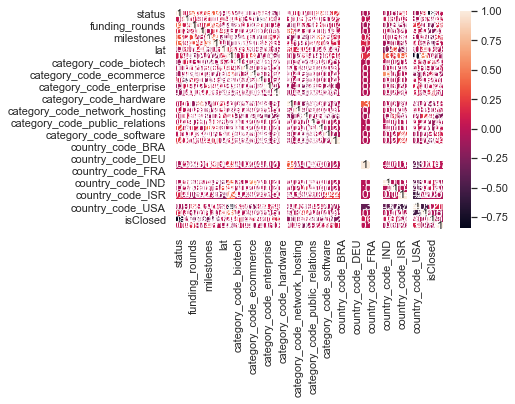

In [96]:
sns.heatmap(company.corr(), annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='funding_total_usd', ylabel='funding_rounds'>

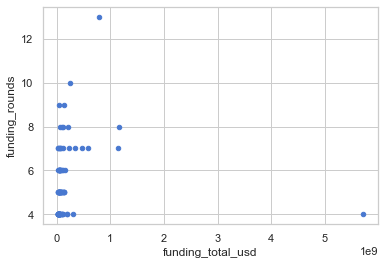

In [97]:
#Numerical-Numerical
#Scatter plot of funding_rounds and funding_total_usd
company.plot.scatter('funding_total_usd', 'funding_rounds')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='funding_total_usd', ylabel='milestones'>

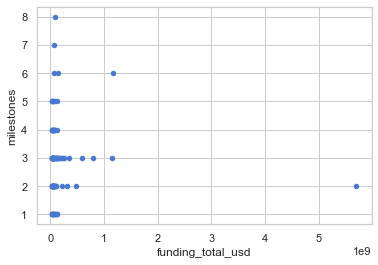

In [98]:
#Scatter plot of funding_total_usd and milestones
company.plot.scatter('funding_total_usd', 'milestones')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='funding_total_usd', ylabel='lat'>

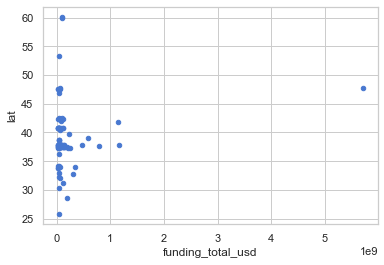

In [99]:
#Scatter plot of funding_total_usd and lat
company.plot.scatter('funding_total_usd', 'lat')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='funding_total_usd', ylabel='lng'>

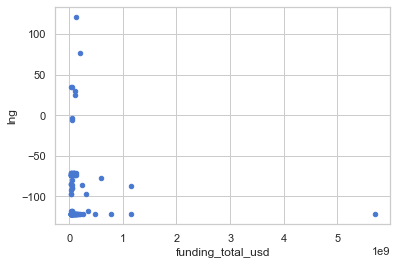

In [100]:
#Scatter plot of funding_total_usd and lat
company.plot.scatter('funding_total_usd', 'lng')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='funding_rounds', ylabel='lat'>

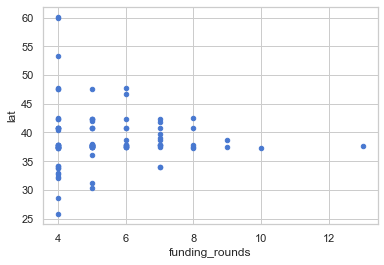

In [101]:
#Scatter plot of funding_rounds and lat
company.plot.scatter('funding_rounds', 'lat')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='funding_rounds', ylabel='lng'>

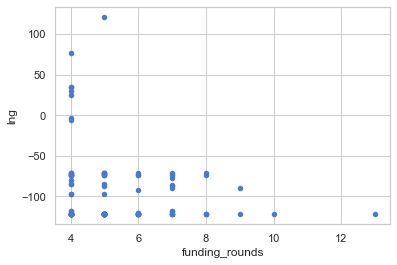

In [102]:
#Scatter plot of funding_rounds and lng
company.plot.scatter('funding_rounds', 'lng')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='founded_at', ylabel='active_days'>

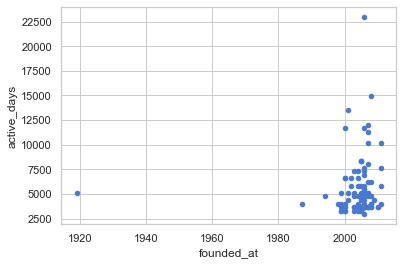

In [103]:
#Scatter plot of active days and founded_at
company.plot.scatter('founded_at', 'active_days')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='isClosed', ylabel='active_days'>

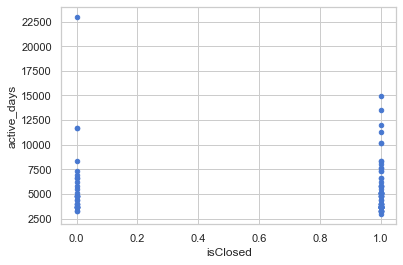

In [132]:
#Scatter plot of isClosed and active_days
company.plot.scatter('isClosed','active_days')

Text(0.5, 1.0, 'Acquired')

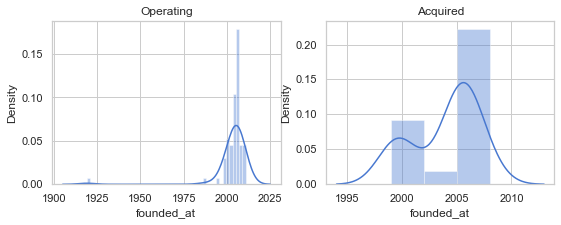

In [122]:
#Categorical-Numerical
# 1=Operating

fig, axes=plt.subplots(1,2,figsize=(9,3))
sns.distplot(company[company['status']==1]['founded_at'],ax=axes[0])

#2=acquired
sns.distplot(company[company['status']==2]['founded_at'],ax=axes[1])

axes[0].set_title('Operating')
axes[1].set_title('Acquired')

Text(0.5, 1.0, 'ipo')

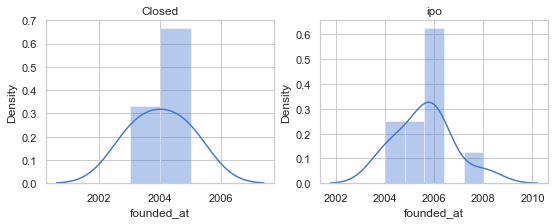

In [123]:
#3=closed
fig, axes=plt.subplots(1,2,figsize=(9,3))
sns.distplot(company[company['status']==3]['founded_at'],ax=axes[0])

#4=ipo
sns.distplot(company[company['status']==4]['founded_at'],ax=axes[1])

axes[0].set_title('Closed')
axes[1].set_title('ipo')

Text(0.5, 1.0, 'Acquired')

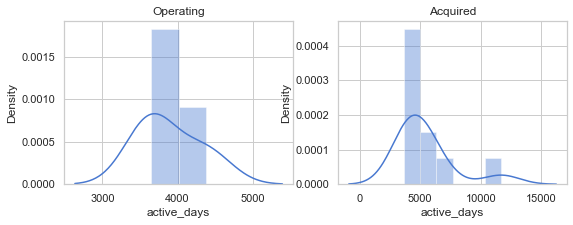

In [124]:
#1=operating
fig, axes=plt.subplots(1,2,figsize=(9,3))
sns.distplot(company[company['status']==3]['active_days'],ax=axes[0])

#2=acquired
sns.distplot(company[company['status']==4]['active_days'],ax=axes[1])

axes[0].set_title('Operating')
axes[1].set_title('Acquired')

Text(0.5, 1.0, 'ipo')

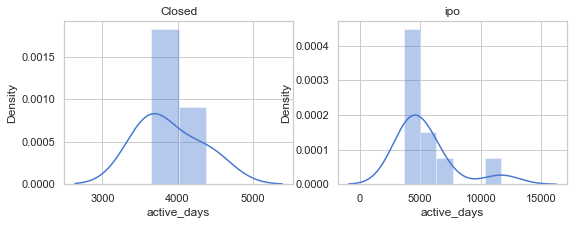

In [125]:
#3=closed
fig, axes=plt.subplots(1,2,figsize=(9,3))
sns.distplot(company[company['status']==3]['active_days'],ax=axes[0])

#4=ipo
sns.distplot(company[company['status']==4]['active_days'],ax=axes[1])

axes[0].set_title('Closed')
axes[1].set_title('ipo')

# Multivariate Analysis

<AxesSubplot:xlabel='funding_total_usd', ylabel='funding_rounds'>

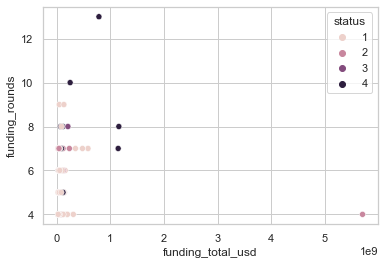

In [105]:
# Scatter plot for funding_total_usd, funding_rounds and status
sns.scatterplot(company['funding_total_usd'], company['funding_rounds'], hue=company['status'])

<AxesSubplot:xlabel='founded_at', ylabel='status'>

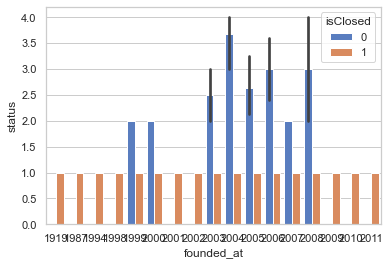

In [106]:
# Bar plot for founded_at status and isClosed
sns.barplot(company['founded_at'], company['status'], hue=company['isClosed'])

<AxesSubplot:xlabel='funding_rounds', ylabel='active_days'>

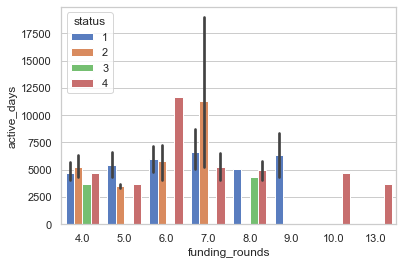

In [128]:
# Bar plot for funding_rounds,active_days and status
sns.barplot(company['funding_rounds'], company['active_days'], hue=company['status'])

# Check Correlation between columns

In [107]:
company.corr()

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
status,1.000000,0.064787,0.421829,0.176068,0.321084,0.391246,-0.066537,0.094126,-0.114301,-0.005185,...,NaN,NaN,-0.056287,-0.056287,0.144449,NaN,-0.092647,0.144449,-0.845812,0.015829
founded_at,0.064787,1.000000,0.095282,0.020593,0.109501,0.048619,0.105693,0.005320,0.125605,-0.051188,...,NaN,NaN,0.067291,0.012920,0.018363,NaN,-0.069170,0.033819,-0.048628,0.059016
funding_rounds,0.421829,0.095282,1.000000,0.070948,0.283515,0.289523,-0.047788,-0.204922,-0.012340,0.058468,...,NaN,NaN,-0.084765,-0.084765,-0.120480,NaN,0.206774,-0.075743,-0.260237,0.166060
funding_total_usd,0.176068,0.020593,0.070948,1.000000,-0.018698,0.191496,0.155039,-0.071823,-0.020253,-0.026172,...,NaN,NaN,0.005513,-0.021153,-0.029396,NaN,0.037201,-0.013642,-0.212892,-0.048432
milestones,0.321084,0.109501,0.283515,-0.018698,1.000000,0.442184,-0.163835,-0.027246,-0.208611,0.065418,...,NaN,NaN,0.008837,0.008837,0.012560,NaN,-0.053110,0.012560,-0.282339,0.165654
relationships,0.391246,0.048619,0.289523,0.191496,0.442184,1.000000,-0.001578,-0.149396,-0.063655,0.030985,...,NaN,NaN,-0.099677,-0.033877,-0.076928,NaN,0.064822,-0.048151,-0.297190,0.013986
lat,-0.066537,0.105693,-0.047788,0.155039,-0.163835,-0.001578,1.000000,0.149239,0.032835,0.098600,...,NaN,NaN,-0.207104,0.286843,-0.193190,NaN,-0.040800,0.190584,0.029059,-0.033049
lng,0.094126,0.005320,-0.204922,-0.071823,-0.027246,-0.149396,0.149239,1.000000,-0.012657,0.070485,...,NaN,NaN,0.375054,0.191960,0.400940,NaN,-0.803578,0.520598,-0.001278,-0.103564
category_code_biotech,-0.114301,0.125605,-0.012340,-0.020253,-0.208611,-0.063655,0.032835,-0.012657,1.000000,-0.028863,...,NaN,NaN,-0.020307,-0.020307,-0.028863,NaN,0.055415,-0.028863,0.135138,0.011270
category_code_consulting,-0.005185,-0.051188,0.058468,-0.026172,0.065418,0.030985,0.098600,0.070485,-0.028863,1.000000,...,NaN,NaN,-0.014213,-0.014213,-0.020202,NaN,0.038787,-0.020202,-0.059498,0.016643


# Feature Engineering

In [133]:
company.columns

Index(['status', 'founded_at', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_games_video', 'category_code_hardware',
       'category_code_mobile', 'category_code_network_hosting',
       'category_code_other', 'category_code_public_relations',
       'category_code_search', 'category_code_software', 'category_code_web',
       'country_code_BRA', 'country_code_CAN', 'country_code_DEU',
       'country_code_ESP', 'country_code_FRA', 'country_code_GBR',
       'country_code_IND', 'country_code_IRL', 'country_code_ISR',
       'country_code_NLD', 'country_code_USA', 'country_code_other',
       'isClosed', 'active_days'],
      dtype='object')

In [139]:
company.columns=['status', 'founded_at', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'lat', 'lng', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_games_video', 'category_code_hardware',
       'category_code_mobile', 'category_code_network_hosting',
       'category_code_other', 'category_code_public_relations',
       'category_code_search', 'category_code_software', 'category_code_web',
       'country_code_BRA', 'country_code_CAN', 'country_code_DEU',
       'country_code_ESP', 'country_code_FRA', 'country_code_GBR',
       'country_code_IND', 'country_code_IRL', 'country_code_ISR',
       'country_code_NLD', 'country_code_USA', 'country_code_other',
       'isClosed', 'active_days']
company.head()


,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,2,2005,7.0,121500000.0,3.0,45.0,42.360082,-71.058880,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
1,1,2006,5.0,46400000.0,2.0,20.0,42.360082,-71.058880,0,0,...,0,0,0,0,0,0,1,0,1,2920.0
2,1,2005,5.0,37570663.0,2.0,4.0,38.040584,-84.503716,0,0,...,0,0,0,0,0,0,1,0,1,3650.0
3,2,2008,5.0,142000000.0,3.0,38.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,0,3650.0
4,1,2006,4.0,57735800.0,4.0,50.0,40.416775,-3.703790,0,0,...,0,0,0,0,0,0,0,0,1,5840.0


In [145]:
#Create X_train, Y_train
X_company=company[['funding_rounds','funding_total_usd']]
Y_company=company['status']

In [146]:
X_company=X_company.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min()))
X_company

,funding_rounds,funding_total_usd
0,0.333333,0.016217
1,0.111111,0.002973
2,0.111111,0.001416
3,0.111111,0.019833
4,0.000000,0.004972
...,...,...
96,0.111111,0.000116
97,0.000000,0.000028
98,0.111111,0.003696
99,0.111111,0.009708
